# Ant Colony Optimization

In [13]:
import numpy as np
import math
import matplotlib.pyplot as plt
import copy
import itertools

#### Define the Problem

In [41]:
class TSPmodel:
    def __init__(self,num):
        # generate random coordinates
        self.cities = np.random.uniform(0,100,(num,2))
        self.n = num
    
        # create distance matrix
        self.distance = np.zeros((num,num))
        
        for i,j in itertools.combinations(range(num),2):
            # compute the euclidean distance
            c1 = self.cities[i]
            c2 = self.cities[j]
            dis = np.sqrt((c1[0]-c2[0])**2 + \
                         (c1[1]-c2[1])**2)
            
            # fill in the distance matrix
            self.distance[i,j] = self.distance[j,i] = dis
    
    def plot_model(self):
        for i,j in zip(range(self.n), self.cities):
            plt.text(j[0] + 0.3, j[1] + 0.3,
                    str(i), color='Black')
        
        plt.plot(self.cities[:,0],
                self.cities[:,1], 'bo')
        plt.show()

In [42]:
# check a sample
country1 = TSPmodel(5)

In [43]:
country1.distance

array([[ 0.        , 23.87983727, 36.10761787, 61.71054866, 66.74753192],
       [23.87983727,  0.        , 14.07321578, 64.3459649 , 44.27478857],
       [36.10761787, 14.07321578,  0.        , 60.95679038, 30.70415258],
       [61.71054866, 64.3459649 , 60.95679038,  0.        , 73.26828524],
       [66.74753192, 44.27478857, 30.70415258, 73.26828524,  0.        ]])

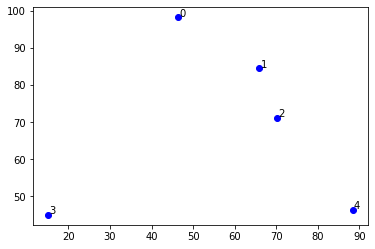

In [44]:
country1.plot_model()

In [153]:
# solution = [0,1,2,4,3]
solution = [0,3,1,4,2]
def tour_length(tour, model):
    tour = np.append(tour,tour[0])
    dis = [model.distance[tour[i], tour[i+1]] for i in range(len(tour)-1)]
    return np.sum(dis)

tour_length(solution, country1)

237.14307258020517

#### Problem Hyperparameters

In [154]:
nCities = 30
country = TSPmodel(nCities)
cost_function = lambda t: tour_length(t, country)

# def cost_function(t):
#     return tour_length(t, country)

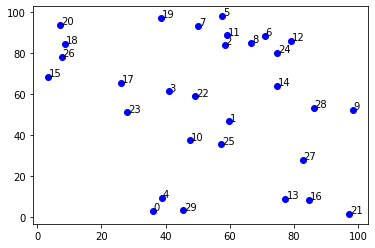

In [155]:
country.plot_model()

#### Ant Transition Rule

![ant](4.jpg)

#### Pheromone Update

![1](66.png)

![3](88.png)

* ant system
* elitist ant system
* ant colony system
* MMAS
* simple ant system
* ...

#### ACO hyperparameters

In [156]:
iterations = 300
nAnts = 50

alpha = 1   # pheromone exponential weight
beta = 1    # heuristic exponential weight

Q = 1       # pheromone deposit coefficient

rho = 0.05  # evaporation rate

initial_tau = 1  # initial pheromone

#### Initilization

In [157]:
tau = np.full((nCities,nCities), initial_tau)

eta = 1 / country.distance

for i in range(nCities):
    eta[i,i] = 0

best_cost = []

class Ant:
    def __init__(self):
        self.tour = []
        self.cost = np.inf

ants = [Ant() for _ in range(nAnts)]

best_ant = Ant()

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [158]:
#### Roulette Wheel

def roulette_wheel(x):
    # x is a list(array) of probabilities
    prob_cum_sum = list(np.cumsum(x))
    r = np.random.random()
    for i,j in enumerate(prob_cum_sum):
        if r<=j:
            return i

#### ACO main loop

In [160]:
for it in range(iterations):
    for k in range(nAnts):
        ants[k].tour = [np.random.randint(0,nCities)]
        
        for _ in range(nCities-1):
            i = ants[k].tour[-1]
            
            p = (tau[i,:]**alpha) * (eta[i,:]**beta)
            
            for psi in ants[k].tour:
                p[psi]= 0
            
            p /= np.sum(p)
            
            j = roulette_wheel(p)
            
            ants[k].tour.append(j)
        
        ants[k].cost = cost_function(ants[k].tour)
        
        if ants[k].cost < best_ant.cost:
            best_ant = copy.deepcopy(ants[k])
    
    #----------------------------------
    # Pheromone update
    # evaporation part
    tau = tau*(1 - rho)
    
    # deposit part
    for k in range(nAnts):
        
        tour = ants[k].tour[:]
        tour.append(tour[0])
        
        for l in range(nCities):
            i = tour[l]
            j = tour[l+1]
            
            tau[i,j] += Q / ants[k].cost
            tau[j,i] = tau[i,j]
    
    #-----------------------------
    # record the best cost
    best_cost.append(best_ant.cost)
    
    # show information
    print (f"Iteration {it}: Best Cost = {best_cost[-1]}")

Iteration 0: Best Cost = 941.6778717121242
Iteration 1: Best Cost = 941.6778717121242
Iteration 2: Best Cost = 941.6778717121242
Iteration 3: Best Cost = 917.3187806197191
Iteration 4: Best Cost = 917.3187806197191
Iteration 5: Best Cost = 866.7027914175924
Iteration 6: Best Cost = 866.7027914175924
Iteration 7: Best Cost = 866.7027914175924
Iteration 8: Best Cost = 866.7027914175924
Iteration 9: Best Cost = 866.7027914175924
Iteration 10: Best Cost = 866.7027914175924
Iteration 11: Best Cost = 777.041232444992
Iteration 12: Best Cost = 777.041232444992
Iteration 13: Best Cost = 777.041232444992
Iteration 14: Best Cost = 777.041232444992
Iteration 15: Best Cost = 777.041232444992
Iteration 16: Best Cost = 777.041232444992
Iteration 17: Best Cost = 777.041232444992
Iteration 18: Best Cost = 777.041232444992
Iteration 19: Best Cost = 777.041232444992
Iteration 20: Best Cost = 777.041232444992
Iteration 21: Best Cost = 777.041232444992
Iteration 22: Best Cost = 777.041232444992
Iteration 

Iteration 186: Best Cost = 449.33016557528293
Iteration 187: Best Cost = 449.33016557528293
Iteration 188: Best Cost = 449.33016557528293
Iteration 189: Best Cost = 449.33016557528293
Iteration 190: Best Cost = 449.33016557528293
Iteration 191: Best Cost = 449.33016557528293
Iteration 192: Best Cost = 449.33016557528293
Iteration 193: Best Cost = 449.33016557528293
Iteration 194: Best Cost = 449.33016557528293
Iteration 195: Best Cost = 449.33016557528293
Iteration 196: Best Cost = 449.33016557528293
Iteration 197: Best Cost = 449.33016557528293
Iteration 198: Best Cost = 449.33016557528293
Iteration 199: Best Cost = 449.33016557528293
Iteration 200: Best Cost = 449.33016557528293
Iteration 201: Best Cost = 449.33016557528293
Iteration 202: Best Cost = 449.33016557528293
Iteration 203: Best Cost = 449.33016557528293
Iteration 204: Best Cost = 449.33016557528293
Iteration 205: Best Cost = 449.33016557528293
Iteration 206: Best Cost = 449.33016557528293
Iteration 207: Best Cost = 449.330

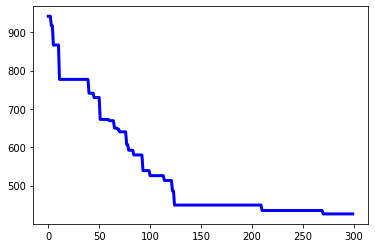

In [161]:
plt.plot(best_cost, linewidth=3, color='blue')
plt.show()

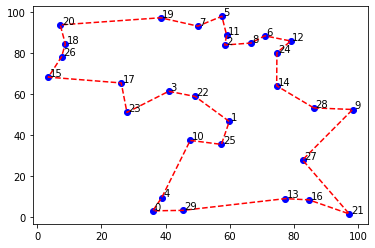

In [162]:
path_x = []
path_y = []
for i in best_ant.tour:
    path_x.append(country.cities[i][0])
    path_y.append(country.cities[i][1])

path_x.append(path_x[0])
path_y.append(path_y[0])

for i,j in zip(range(nCities), country.cities):
    plt.text(j[0] + 0.5, j[1] + 0.5,
            str(i), color= 'Black')

plt.plot(country.cities[:,0], country.cities[:,1], 'bo')
plt.plot(path_x,path_y, 'r--')
plt.show()